In [16]:
import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import (GridSearchCV, ParameterGrid,
                                     RandomizedSearchCV, train_test_split)
from sklearn.metrics import (roc_curve, precision_recall_curve, auc, make_scorer, 
                             recall_score, accuracy_score, precision_score, confusion_matrix)
from tools import (Modelisation, datasets, SearchCV, restauration_CV, 
                   graph_2scores_CV, graph_3scores_CV, graph_param_CV, 
                   best_score_CV)

plt.style.use("ggplot")

t = time.time()

In [2]:
df = pd.read_csv('data/df_train_prepro.csv').sample(frac=1)
df.shape

(1610494, 48)

## Random forest 

In [3]:
model = RandomForestClassifier()

cv_params = {
        'bootstrap': [False, True],
        'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
        'max_features': ['sqrt', 'log2'],
        'min_samples_leaf': [1, 2, 4],
        'min_samples_split': [2, 5, 10],
        'n_estimators': [100, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
}

scoring = {'recall': 'recall',
           'precision': 'precision',
           'f1': 'f1',
           'f3': make_scorer(fbeta_score, beta=3),
           'f5': make_scorer(fbeta_score, beta=5)
          }

print(len(ParameterGrid(cv_params)))

4356


In [4]:
dico, results = restauration_CV('Forest_CV_Randomized1000_4356_0.05')

model : RandomForestClassifier()
model_name : Forest
type : RandomizedSearchCV
len_grid : 4356
n_iter : 1000
data_frac : 0.05
temps : 06:51:15
n_jobs : 28
params : {'bootstrap': [False, True], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None], 'max_features': ['sqrt', 'log2'], 'min_samples_leaf': [1, 2, 4], 'min_samples_split': [2, 5, 10], 'n_estimators': [100, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}
scoring : {'recall': 'recall', 'precision': 'precision', 'f1': 'f1', 'f3': make_scorer(fbeta_score, beta=3), 'f5': make_scorer(fbeta_score, beta=5)}


In [5]:
best_param_forest = best_score_CV(dico, results, 'f3')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,...,rank_test_precision,mean_test_f1,std_test_f1,rank_test_f1,mean_test_f3,std_test_f3,rank_test_f3,mean_test_f5,std_test_f5,rank_test_f5
702,77.505569,0.898281,2.340056,0.029954,400,2,1,sqrt,30,False,...,959,0.123778,0.008302,1,0.076547,0.005497,1,0.072303,0.005226,1
101,19.949111,0.875254,0.658975,0.092017,100,2,1,sqrt,60,False,...,993,0.123298,0.005852,2,0.076512,0.004075,2,0.072292,0.00389,2
516,42.058799,6.027751,1.223548,0.03364,200,2,1,sqrt,60,False,...,962,0.122304,0.007375,3,0.075568,0.004993,3,0.071373,0.004756,3
994,19.700876,0.218639,0.613247,0.011177,100,2,1,sqrt,<NA>,False,...,999,0.12048,0.011919,4,0.07478,0.007974,4,0.070658,0.007585,4
880,236.229033,2.327122,7.003332,0.127823,1200,2,1,sqrt,50,False,...,977,0.1204,0.005867,5,0.074342,0.003891,5,0.070211,0.0037,5
886,117.831136,1.732347,3.584187,0.138496,600,2,1,sqrt,50,False,...,983,0.120272,0.009643,6,0.074331,0.00646,6,0.070206,0.006146,6
733,19.694853,0.122897,0.618738,0.014712,100,2,1,sqrt,70,False,...,1000,0.119663,0.010541,9,0.074285,0.00705,7,0.070191,0.006706,7
831,79.719741,0.534912,2.366392,0.016282,400,2,1,sqrt,40,False,...,972,0.120073,0.008818,7,0.0741,0.005918,8,0.069978,0.00563,8
430,316.67332,4.973586,9.936224,1.218804,1600,2,1,sqrt,60,False,...,974,0.119691,0.005106,8,0.073854,0.003529,9,0.069745,0.003368,9
556,198.807608,2.318134,5.848273,0.054374,1000,2,1,sqrt,90,False,...,990,0.119492,0.008146,10,0.073839,0.005469,10,0.069741,0.005204,10


{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': False}

In [6]:
clf = RandomForestClassifier(n_estimators=400, min_samples_split=2, min_samples_leaf=1, 
                             max_features='sqrt', max_depth=30, bootstrap=False)

In [7]:
datasets_df = datasets(df, verbose=False)
X = datasets_df['X']
y = datasets_df['y']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=1234)
clf.fit(X_train, y_train)
y_scores = clf.predict_proba(X_test)[:, 1]

In [11]:
def adjusted_classes(y_scores, t):
    return [1 if y >= t else 0 for y in y_scores]

In [24]:
p, r, thresholds = precision_recall_curve(y_test, y_scores)

In [63]:
def plot_metrics_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(8, 8))
    plt.title("Metrics as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "k-", label="Recall")
    f1 = 2*p*r/(p+r)
    f3 = 10*p*r/(9*p+r)
    f5 = 26*p*r/(25*p+r)
    plt.plot(thresholds, f1[:-1], 'r', label="F1")
    plt.plot(thresholds, f3[:-1], 'm', label="F3")
    plt.plot(thresholds, f5[:-1], 'g', label="F5")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')

C:\Users\Vincent\anaconda3\envs\statapp\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
C:\Users\Vincent\anaconda3\envs\statapp\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
C:\Users\Vincent\anaconda3\envs\statapp\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


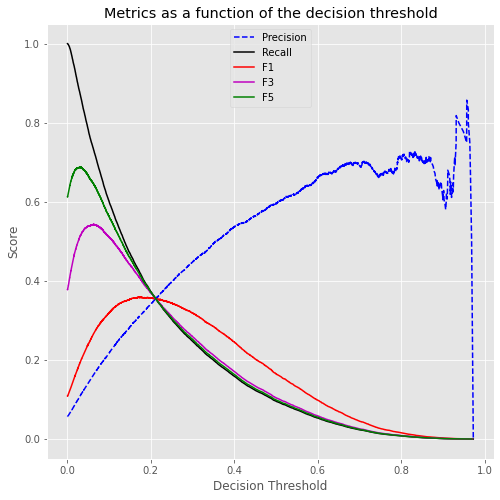

In [64]:
plot_metrics_vs_threshold(p, r, thresholds)

In [35]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8,8))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")
    plt.legend(loc='best')

0.8279814358894501


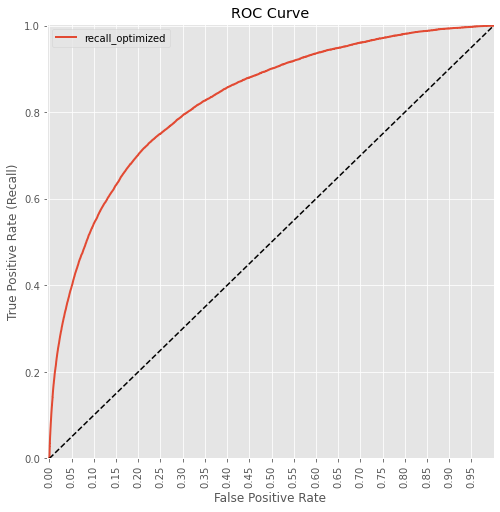

In [36]:
fpr, tpr, auc_thresholds = roc_curve(y_test, y_scores)
print(auc(fpr, tpr)) # AUC of ROC
plot_roc_curve(fpr, tpr, 'recall_optimized')